In [3]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import os
import glob
import cv2

In [28]:
def ReadFloat(filename):
    with open(filename, 'r') as f:
        data = f.read()
        depth = np.frombuffer(data, np.float32).reshape(256,512)
        return depth

(1024, 2048, 3)


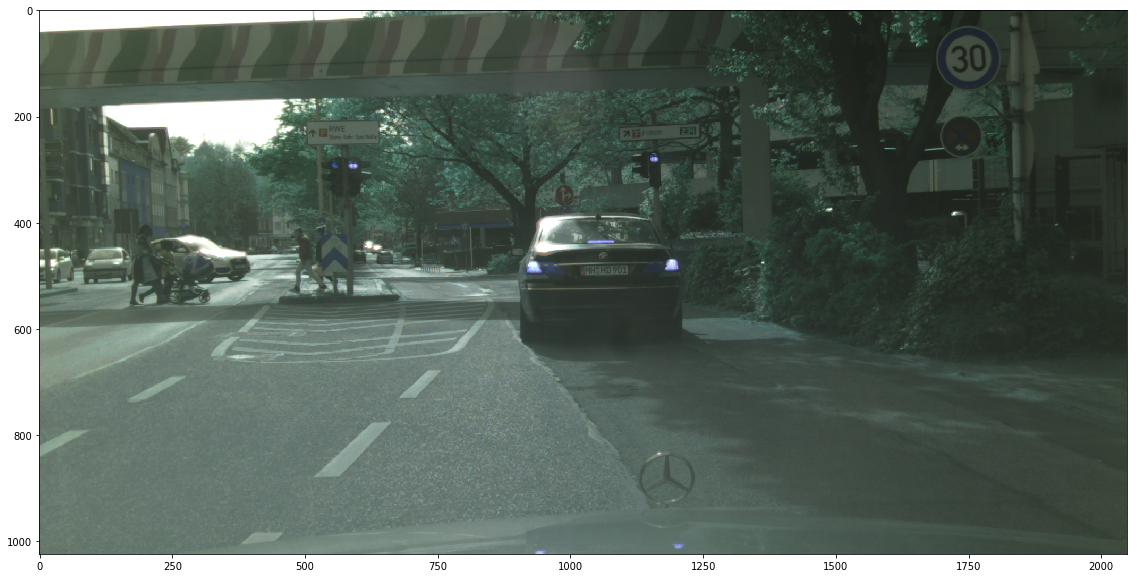

In [31]:
filepattern = '/opt/data/leftImg8bit/train_extra/muhlheim-ruhr/muhlheim-ruhr_000000_000709_leftImg8bit'
img = cv2.imread(filepattern + '.png')
f1 = plt.imshow(img)
print img.shape
#print np.unique(img)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20,10)
plt.show()

(256, 512)
0.0
255.0


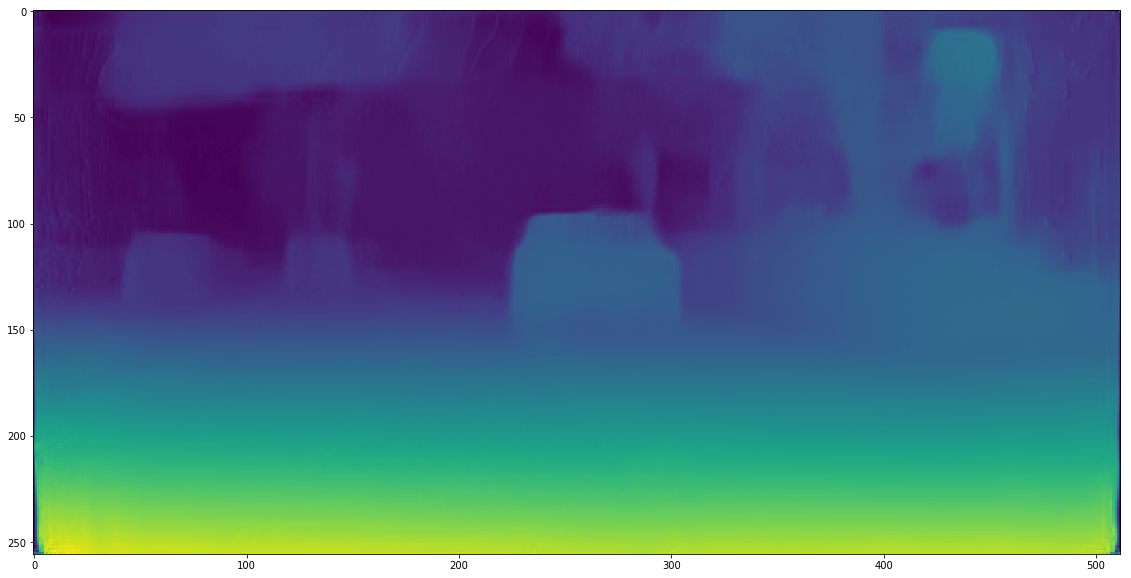

In [40]:
disp = ReadFloat(filepattern + '.flt')
f1 = plt.imshow(disp.astype(np.float))
print disp.shape
#print np.unique(img)
print np.min(disp)
print np.max(disp)
#print np.unique(disp)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20,10)
plt.show()

(1024, 2048, 3)
[0]


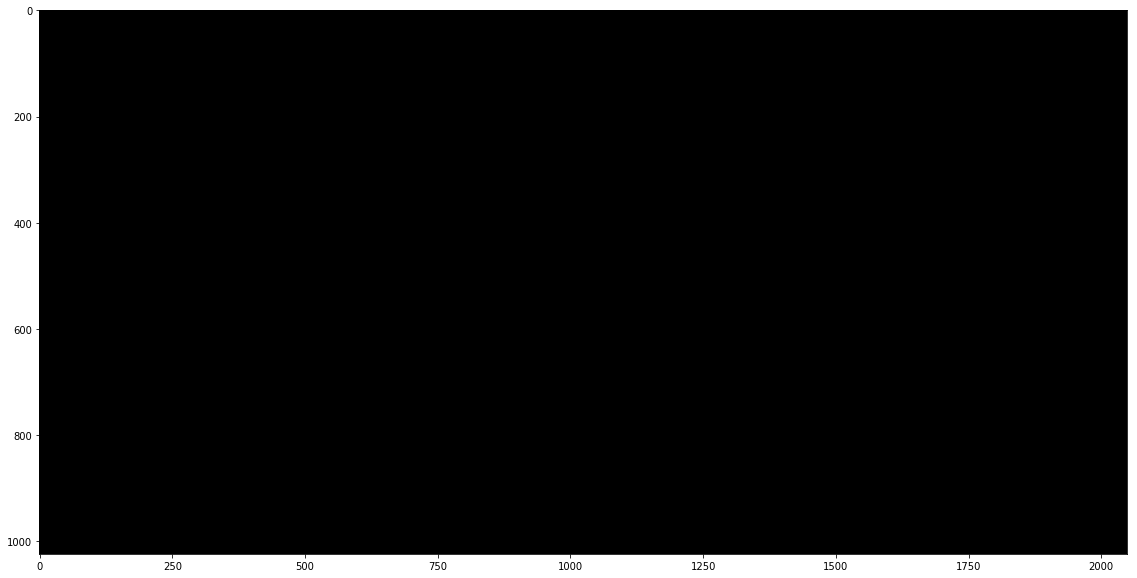

In [34]:
instance = cv2.imread(filepattern + '.inst.png')
f1 = plt.imshow(instance.astype(float))
print instance.shape
print np.unique(instance)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20,10)
plt.show()

[   0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.
   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.
   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.
   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.
   60.   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.
   72.   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.
   84.   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.
   96.   97.   98.   99.  100.  101.  102.  103.  104.  105.  106.  107.
  108.  109.  110.  111.  112.  113.  114.  115.  116.  117.  118.  119.
  120.  121.  122.  123.  124.  125.  126.  127.  128.  129.  130.  131.
  132.  133.  134.  135.  136.  137.  138.  139.  140.  141.  142.  143.
  144.  145.  146.  147.  148.  149.  150.  151.  152.  153.  154.  155.
  156.  157.  158.  159.  160.  161.  162.  163.  1

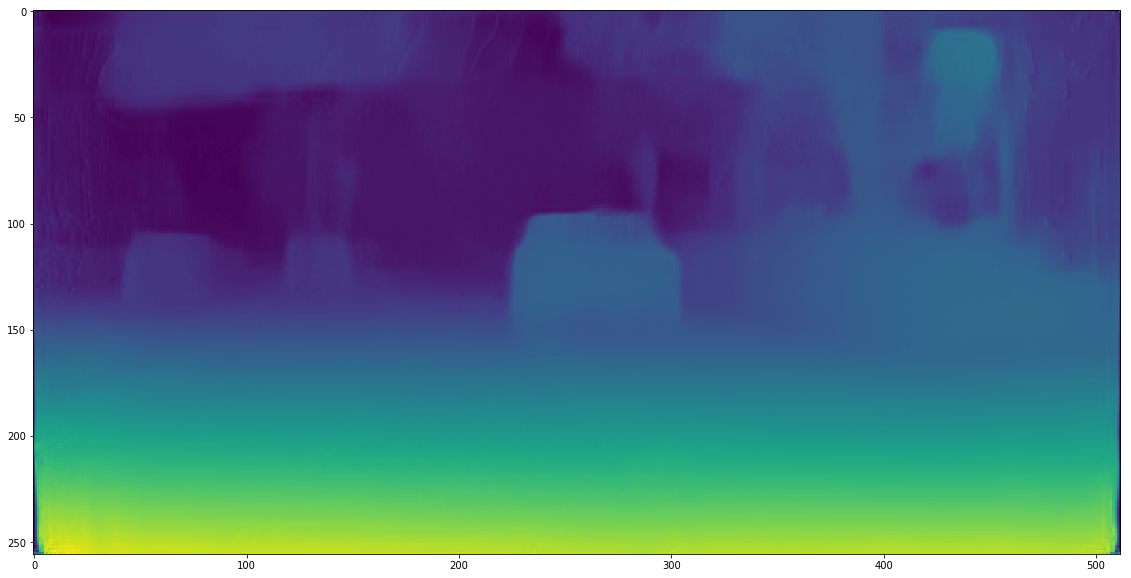

In [61]:
fs = cv2.FileStorage('./build/test_out.yml', cv2.FILE_STORAGE_READ)
disp2 = fs.getNode('disp')
disp2 = disp2.mat()
f1 = plt.imshow(disp2)
print np.unique(disp2)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20,10)
plt.show()

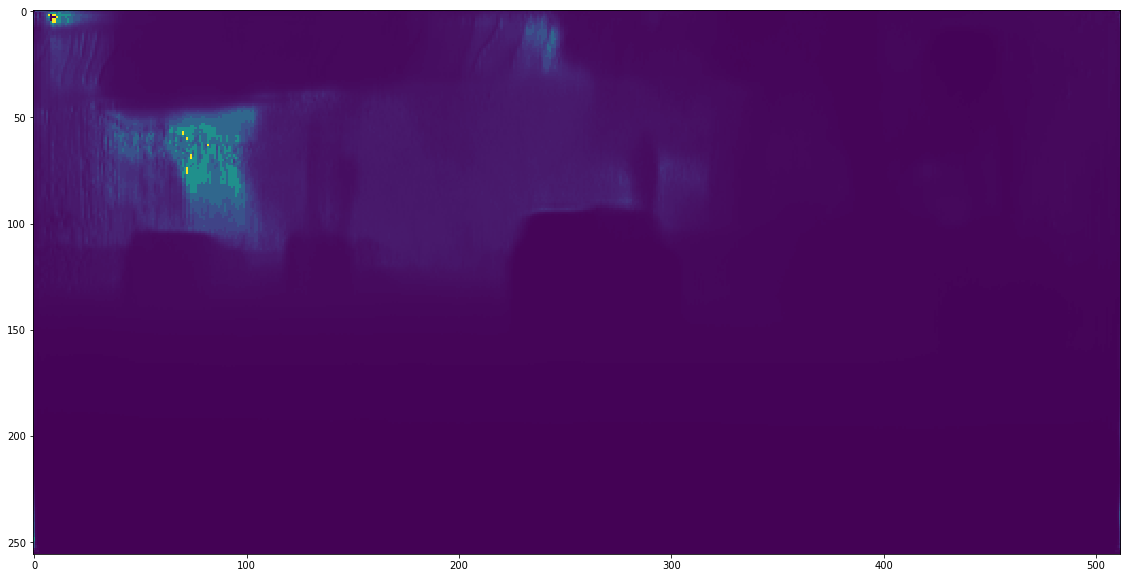

In [62]:
depth = fs.getNode('depth')
depth = depth.mat()
f1 = plt.imshow(depth.astype(float))
#print np.unique(depth.astype(float))
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20,10)
plt.show()

(2097152, 1)
(2048, 1024)
(2097152,)


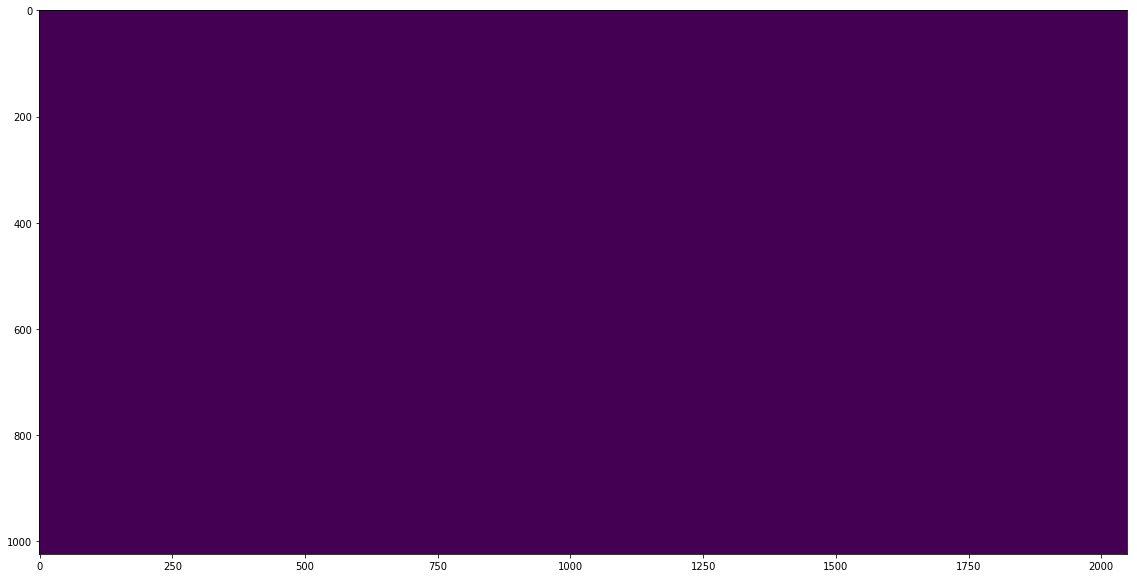

In [79]:
inliers = fs.getNode('inliers')
inliers = inliers.mat()
print inliers.shape
img_trim = disp
img_trim = cv2.resize(img_trim, (1024,2048))
print img_trim.shape
img_trim = img_trim.reshape((1024*2048))
print img_trim.shape
img_trim[inliers] = 0
img_trim = img_trim.reshape((1024,2048))
f1 = plt.imshow(img_trim)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20,10)
plt.show()

In [80]:
print inliers

[[      0]
 [      1]
 [      2]
 ..., 
 [2097149]
 [2097150]
 [2097151]]
